## **QRNG** - *Quantum Random Number Generation*
* October 15°, 2025
#### CIC - IPN: *Qiskit Fall Fest*

> Alexander Sanchez

* How to install qiskit-aer:

You can install `qiskit-aer` using pip:

```bash
pip install qiskit-aer
```

Or if you prefer using conda:

```bash
conda install -c conda-forge qiskit-aer
```

**Note**: `qiskit-aer` is the high-performance simulator for Qiskit that provides noise models and advanced simulation capabilities. It's essential for running quantum circuits locally with realistic noise modeling.

In [3]:
!pip install qiskit-aer

^C



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


* Define the quantum circuit

Quantum Circuit:


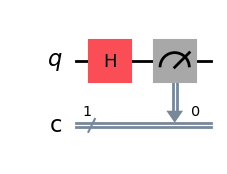

In [2]:
# Perform a quantum random number generation using Qiskit simulating locally
# and visualize the results with matplotlib and seaborn
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Set up the quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Apply Hadamard gate to create superposition
qc.measure(0, 0)  # Measure the qubit

print("Quantum Circuit:")
qc.draw(output='mpl')

* Simulate the circuit


Measurement results: {'0': 509, '1': 515}


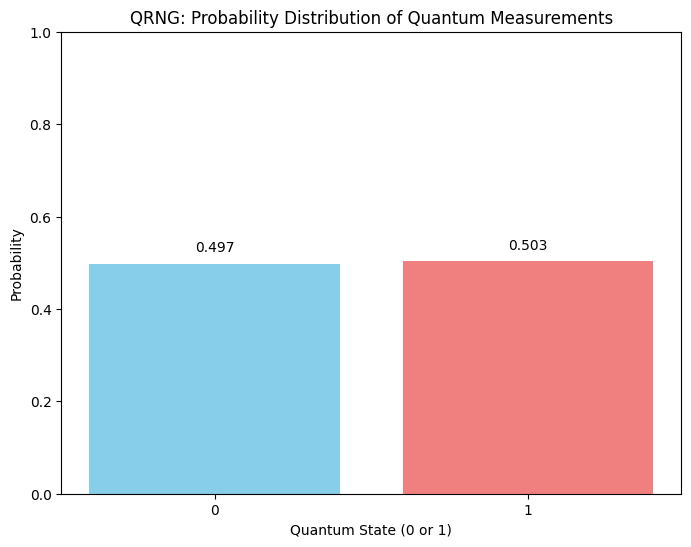

In [3]:
# Simulate the circuit
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(transpiled_circuit, shots=1024)
# job = simulator.run(transpiled_circuit, shots=1024, seed_simulator=42)
result = job.result()
counts = result.get_counts()

print(f"\nMeasurement results: {counts}")

# Alternative visualization using matplotlib
plt.figure(figsize=(8, 6))
states = list(counts.keys())
probabilities = [counts[state]/1024 for state in states]

plt.bar(states, probabilities, color=['skyblue', 'lightcoral'])
plt.xlabel('Quantum State (0 or 1)')
plt.ylabel('Probability')
plt.title('QRNG: Probability Distribution of Quantum Measurements')
plt.ylim(0, 1)

# Add probability labels on bars
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 0.02, f'{prob:.3f}', ha='center', va='bottom')

plt.show()

* **Challenge**: Generate a random number (base 10) given a range between `n` and `m` using the quantum circuit above.

In [122]:

import math
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator


class QuantumRandomNumberGenerator:
    def __init__(self, backend=None, start=0, end=1):
        self.backend = backend or AerSimulator()
        self.start = start
        self.end = end
        self.qubits_needed, self.size = self._calculate_qubits_needed(start, end)

    def _calculate_qubits_needed(self, n: int, m: int) -> int:
        size = m - n + 1
        k = math.ceil(math.log2(size)) or 1
        return k, size

    def get_random_bits(self, shots: int) -> str:
        qr = QuantumRegister(self.qubits_needed)
        cr = ClassicalRegister(self.qubits_needed)
        qc = QuantumCircuit(qr, cr)
        qc.h(qr)  # Apply Hadamard gate to all qubits to create superposition
        qc.measure(qr, cr)
        tqc = transpile(qc, self.backend)
        job = self.backend.run(tqc, shots=shots)
        result = job.result()
        counts = result.get_counts()
        return counts
        """
        bitstring = next(iter(counts.keys()))
        return bitstring
        """

    def valid_counts(self, counts) -> dict:
        v_counts = {}
        for bitstring, count in counts.items():
            value = int(bitstring, 2)
            if value < self.size:
                v_counts[bitstring] = count

        return v_counts, sum(v_counts.values())
    
    def combine_counts(self, counts1, counts2) -> dict:
        combined_counts = counts1.copy()
        for bitstring, count in counts2.items():
            if bitstring in combined_counts:
                combined_counts[bitstring] += count
            else:
                combined_counts[bitstring] = count
        return combined_counts

    def _generate_shots(self, shots) -> dict:
        # This method will generate the required number of shots
        counts = self.get_random_bits(shots)
        return self.valid_counts(counts)

    # generate_random_number generates a random integer between n and m
    def generate_random_number(self, shots) -> int:
        # When a qbit is measured, it collapses to either 0 or 1 with equal probability.
        # To generate a random integer in the range [n, m], we need enough qubits to cover the range.
        # Calculate the number of qubits required to represent the range size.
        # As the range size is (m - n + 1), we need ceil(log2(size)) qubits because each qubit can represent 2 states.
        # For example, to represent numbers from 0 to 7 (size 8), we need 3 qubits (2^3 = 8). 111
        total_valid_shots_created = 0
        generated_valid_counts = []
        while total_valid_shots_created < shots:
            valid_counts, total_shots = self._generate_shots(shots - total_valid_shots_created)
            generated_valid_counts.append(valid_counts)
            total_valid_shots_created += total_shots
        else:
            numbers = {}
            for i in range(len(generated_valid_counts)):
                if i == 0:
                    valid_counts = generated_valid_counts[i]
                else:
                    valid_counts = self.combine_counts(valid_counts, generated_valid_counts[i])
            for bitstring, count in valid_counts.items():
                value = int(bitstring, 2)
                numbers[self.start + value] = count
            return numbers

In [128]:
# plots
import matplotlib.pyplot as plt
import seaborn as sns

generator = QuantumRandomNumberGenerator(start=-1, end=1)


In [133]:
numbers = generator.generate_random_number(100)

In [134]:
numbers

{0: 39, -1: 29, 1: 32}

In [135]:
print(sum(numbers.values()))

100


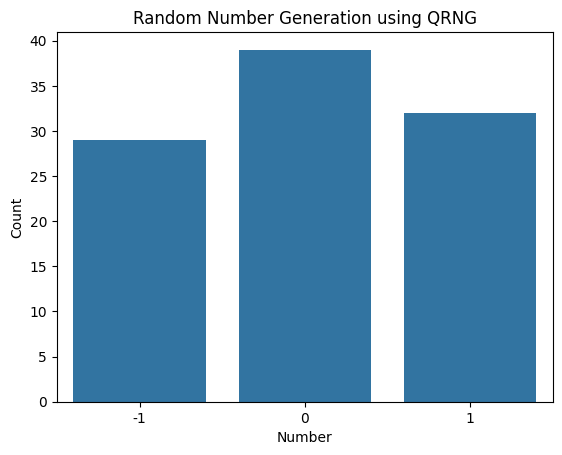

In [136]:
numbers_name = list(numbers.keys())
counts = list(numbers.values())

sns.barplot(x=numbers_name, y=counts)

plt.xlabel("Number")
plt.ylabel("Count")
plt.title("Random Number Generation using QRNG")

# Mostrar la gráfica
plt.show()